# 농어 무게 예측하기

### 데이터 준비하기

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
                        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                        110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 
                        300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 
                        685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 
                        820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

### 산점도 그리기

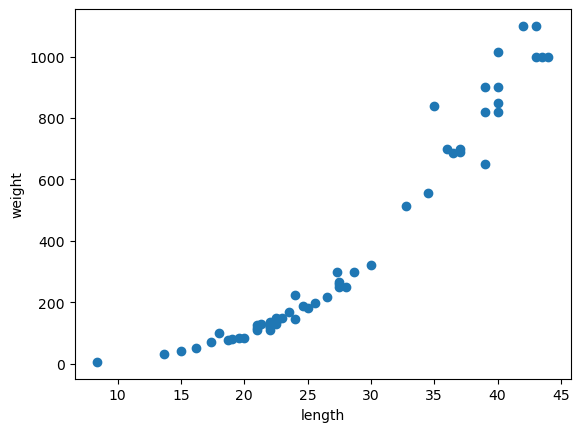

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 세트와 테스트 세트 나누기

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
test_array = np.array([1,2,3,4])
test_array.shape

(4,)

### 2차원 배열로 변환하기

In [5]:
test_array = test_array.reshape(2, 2)
test_array.shape

(2, 2)

In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### k-최근접 알고리즘 훈련하기

##### 결정계수

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [14]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 생성한다.
test_prediciton = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediciton)
# mean_absolute_error() 함수는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.
mae

19.157142857142862

### 과대 적합 vs 과소 적합

In [16]:
# 위에서 훈련한 모델을 이용하여 훈련세트의 결정계수값을 확인한다.
knr.score(train_input, train_target)

0.9698823289099254

### 이웃 갯수 줄이기

In [19]:
knr.n_neighbors = 3 # 이웃 갯수를 3으로 지정한다.

# 모델을 다시 훈련한다.
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [20]:
# 테스트
knr.score(test_input, test_target)

0.9746459963987609

### 128p 확인문제

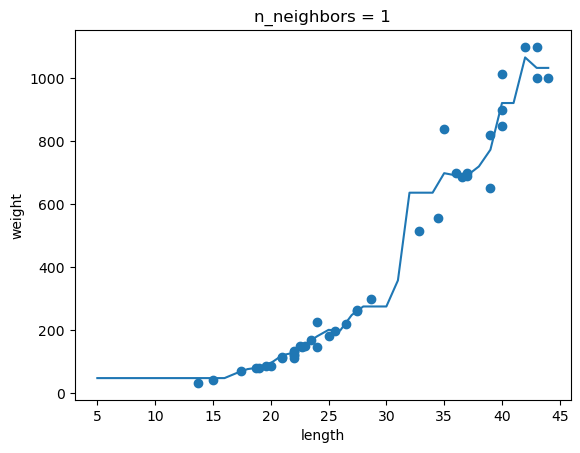

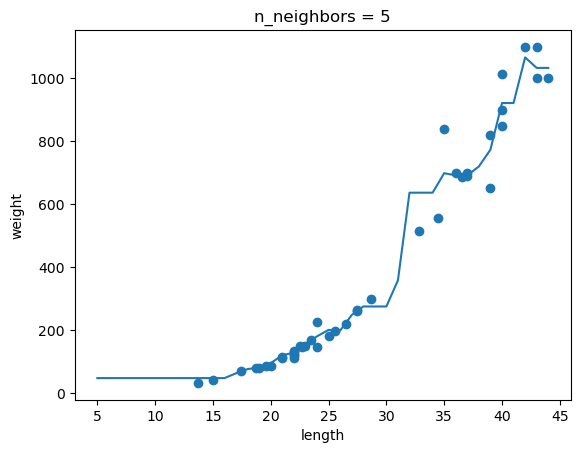

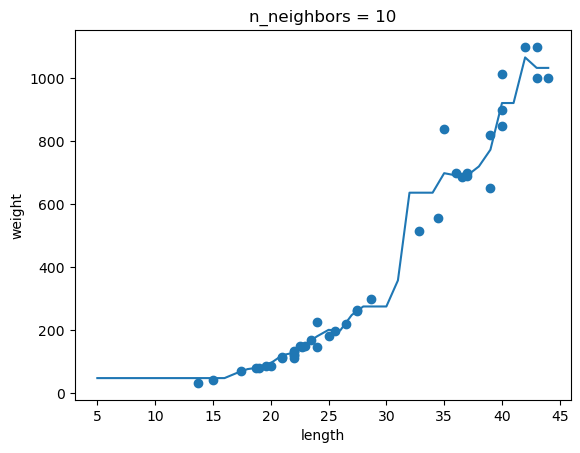

In [27]:
# 2번

# k-최근접 이웃 회괴 객체 생성한다.
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 생성한다.
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일때 예측 결과를 그래프로 그린다.
for n in [1, 5, 10]:
    # 모델을 훈련한다.
    knr.n_neighbors = 3
    knr.fit(train_input, train_target)

    # 지정한 범위 x에 대한 예측을 구한다
    prediction = knr.predict(x)

    # 훈련 세트와 예측 결과를 그래프로 그린다.
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()